In [1]:
## import the necessary tools, and check their corresponding versions
import numpy as np
print("numpy:", np.__version__)
import pandas as pd
print("pandas:", pd.__version__)
import matplotlib.pyplot as plt
import codecs
import scipy
from scipy.stats import linregress
from scipy.stats.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

('numpy:', '1.11.1')
('pandas:', u'0.18.1')


# EuiYul Song
## Problem Set 4

# 1. Explore the data

## Load the data

In [3]:
print("Load Data")
data = pd.read_csv('wdbc.csv.bz2', sep = ",").drop(['id'], axis=1)
data

Load Data


,diagnosis,radius.mean,texture.mean,perimeter.mean,area.mean,smoothness.mean,compactness.mean,concavity.mean,concpoints.mean,symmetry.mean,...,radius.worst,texture.worst,perimeter.worst,area.worst,smoothness.worst,compactness.worst,concavity.worst,concpoints.worst,symmetry.worst,fracdim.worst
0,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.71190,0.26540,0.4601,0.11890
1,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.24160,0.18600,0.2750,0.08902
2,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.45040,0.24300,0.3613,0.08758
3,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
4,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
5,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,0.2087,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
6,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,0.1794,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.37840,0.19320,0.3063,0.08368
7,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,0.2196,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.26780,0.15560,0.3196,0.11510
8,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,0.2350,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
9,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,0.2030,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.10500,0.22100,0.4366,0.20750


## Create a summary table

In [4]:
data['diagnosis'] = (data['diagnosis'] == 'M').astype(int)

In [5]:
exploration = data.describe().T[['min', 'max', 'mean']]
exploration['range'] = '(' + exploration['min'].astype(str) + ', ' + exploration['max'].astype(str) + ')'
exploration['missing'] = data.isnull().sum()
exploration.drop(['min', 'max'], axis=1)
exploration['slope'] = ""
exploration['intercept'] = ""
exploration['r-value'] = ""
exploration['p-value'] = ""
exploration['stderr'] = ""
exploration['corr'] = ""

for i in data.columns:
    #output = pearsonr(data['diagnosis'], data[i])
    linregressLine = linregress(data['diagnosis'], data[i])
    exploration.loc[i, ['slope']] = linregressLine[0]
    exploration.loc[i, ['intercept']] = linregressLine[1]
    exploration.loc[i, ['r-value']] = linregressLine[2]
    exploration.loc[i, ['p-value']] = linregressLine[3]
    exploration.loc[i, ['stderr']] = linregressLine[4]
    exploration.loc[i, ['corr']] = (abs(exploration.loc[i, ['r-value']]).astype(float) > 0.5).bool()
exploration

,min,max,mean,range,missing,slope,intercept,r-value,p-value,stderr,corr
diagnosis,0.000000,1.00000,0.372583,"(0.0, 1.0)",0,1,0,1,0,0,True
radius.mean,6.981000,28.11000,14.127292,"(6.981, 28.11)",0,5.31631,12.1465,0.730029,8.46594e-96,0.209009,True
texture.mean,9.710000,39.28000,19.289649,"(9.71, 39.28)",0,3.69014,17.9148,0.415185,4.05864e-25,0.339567,False
perimeter.mean,43.790000,188.50000,91.969033,"(43.79, 188.5)",0,37.29,78.0754,0.742636,8.43625e-101,1.41222,True
area.mean,143.500000,2501.00000,654.889104,"(143.5, 2501.0)",0,515.586,462.79,0.708984,4.73456e-88,21.5378,True
smoothness.mean,0.052630,0.16340,0.096360,"(0.05263, 0.1634)",0,0.0104208,0.0924776,0.35856,1.05185e-18,0.00113938,False
compactness.mean,0.019380,0.34540,0.104341,"(0.01938, 0.3454)",0,0.0651032,0.0800846,0.596534,3.93826e-56,0.00367848,True
concavity.mean,0.000000,0.42680,0.088799,"(0.0, 0.4268)",0,0.114717,0.0460576,0.69636,9.96656e-84,0.00496526,True
concpoints.mean,0.000000,0.20120,0.048919,"(0.0, 0.2012)",0,0.0622726,0.0257174,0.776614,7.10115e-116,0.00212141,True
symmetry.mean,0.106000,0.30400,0.181162,"(0.106, 0.304)",0,0.018723,0.174186,0.330499,5.73338e-16,0.00224541,False


## Graphical Exploration

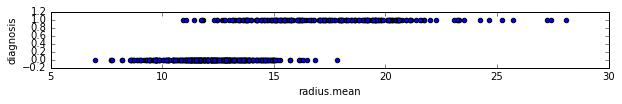

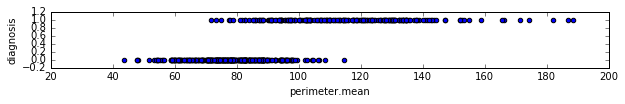

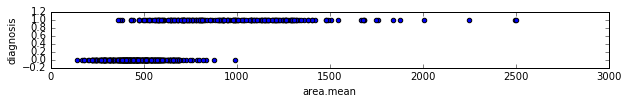

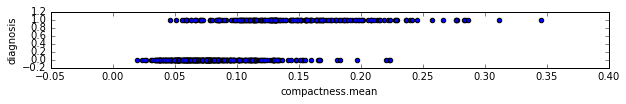

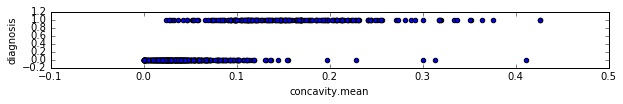

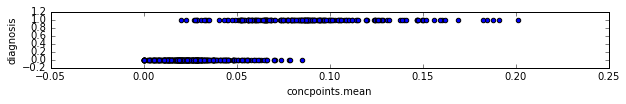

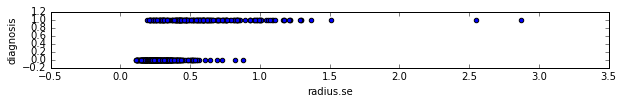

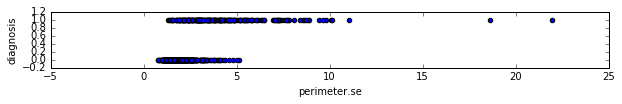

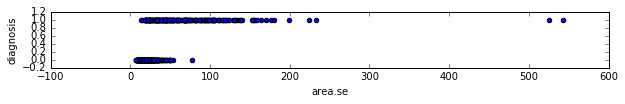

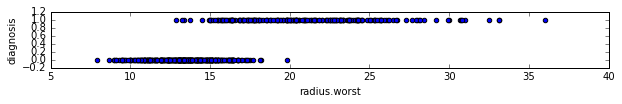

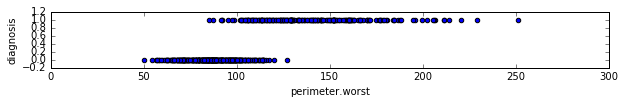

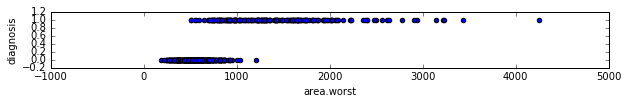

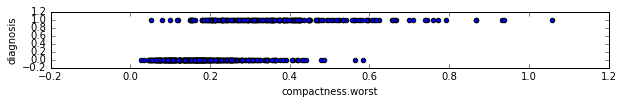

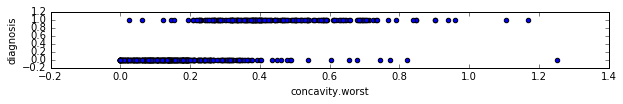

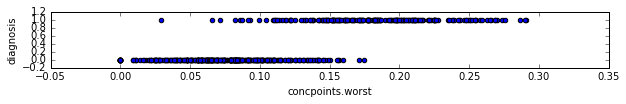

In [6]:
for i in data.columns:
    if (i != 'diagnosis'):
        if (exploration.loc[i, ['corr']].bool()):
            plt.figure(figsize = (10, 1))
            plt.scatter(data[i], data['diagnosis'])
            plt.xlabel(i)
            plt.ylabel('diagnosis')
            plt.show()

# 2. Decision Boundary
## 2.1 kNN Case

Decision Boundary
2.1 kNN Case 1-2


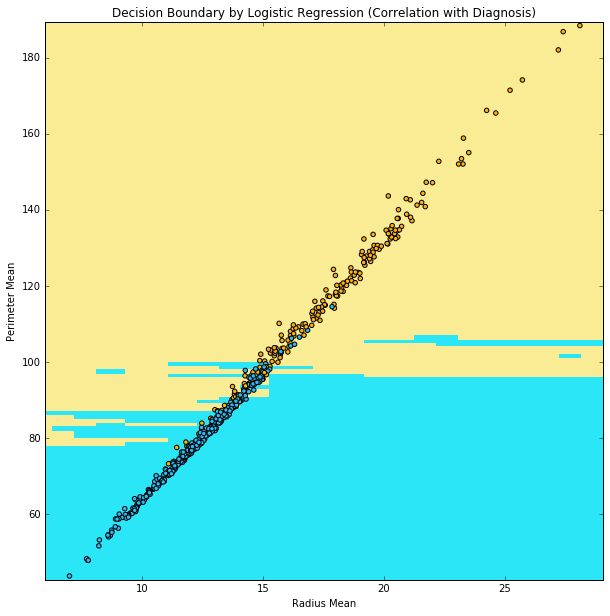

In [11]:
print("Decision Boundary")
print("2.1 kNN Case 1-2")

from matplotlib.colors import ListedColormap
from sklearn import neighbors

scattercmap = ListedColormap(['#2abdf7', '#ffb307'])
colormesh = ListedColormap(['#2ae6f7', '#faec94'])
h = 0.3
x = data[['radius.mean', 'perimeter.mean']]
y = data['diagnosis']

clf = neighbors.KNeighborsClassifier(5)
clf.fit(x, y)

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=colormesh)

# Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())


plt.show()

## Describe your observation.

To certain extend, kNN is good at picking up the actual shape. For example, kNN predicts which variables are located horizontally and vertically on the plot. However, it is not predicting actual location of the plots.

However, I believe that it does pick up the noise, because it picks up the noise between perimeter mean value (78, 82), (87, 100), and (105, 110)

## 2.2 Logistic Regression

Logistic Regression
Now repeat the process above by logistic regression. Pick the same features as in the case of kNN.


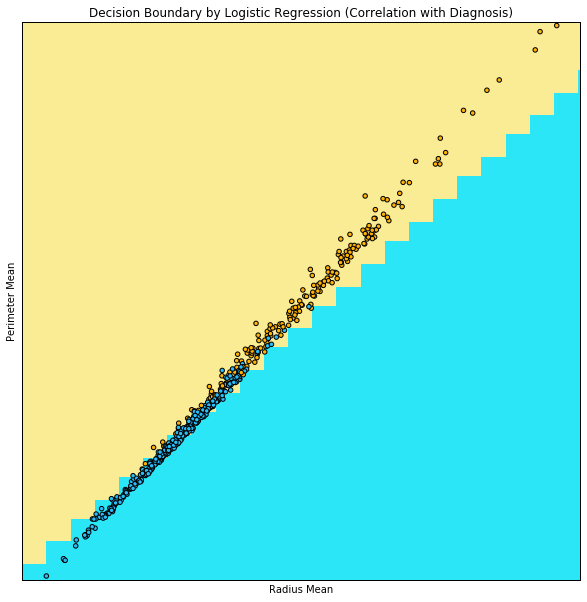

In [12]:
print("Logistic Regression")
print("Now repeat the process above by logistic regression. Pick the same features as in the case of kNN.")
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model, datasets
plt.figure(figsize = (100, 100))

h = .03  # step size in the mesh
x = data[['radius.mean', 'perimeter.mean']]
y = data['diagnosis']
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(x, y)

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])

Z = Z.reshape(xx.shape)
plt.figure(figsize=(10, 10))
plt.pcolormesh(xx, yy, Z, cmap=colormesh)

# Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel('Radius Mean')
plt.ylabel('Perimeter Mean')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Describe the observations
Compare to kNN, the Logistic Regression is more precise and accurate in terms of predicting the actual location of the plot. However, it is not predicting which variables are located on the plot.

I believe that it does not pick up the noise, because it is too simple to explain variance.

# 2.3 Feature Engineering 1 : x = x^2 and y = y^2

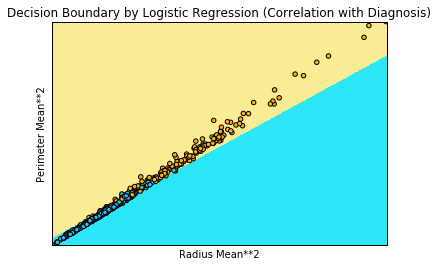

In [14]:
from sklearn.cross_validation import train_test_split

logreg = linear_model.LogisticRegression(C=1e5)
plt.figure(figsize = (100, 100))
h = 0.3
x = data[['radius.mean', 'perimeter.mean']]**2
y = data['diagnosis']**2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


# Fit the LogisticRegression instance
logreg.fit(x_train, y_train)

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=colormesh)

# Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel('Radius Mean**2')
plt.ylabel('Perimeter Mean**2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Describe the observations¶
Similar to the Logistic Regression, this feature engineering is precise and accurate in terms of predicting the actual location of the plot. However, it is not predicting which variables are located on the plot.

I believe that it does not pick up the noise, because it is too simple to explain variance.

# 2.3 Feature Engineering 2 : x = x * y and y = y

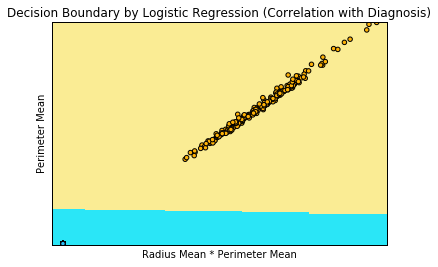

In [15]:
logreg = linear_model.LogisticRegression(C=1e5)
plt.figure(figsize = (100, 100))
h = 0.3
x = data[['radius.mean', 'perimeter.mean']]
y = data['diagnosis']

x = pd.concat([x.multiply(y, axis="index")], axis = 1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


# Fit the LogisticRegression instance
logreg.fit(x_train, y_train)

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=colormesh)

# Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel('Radius Mean * Perimeter Mean')
plt.ylabel('Perimeter Mean')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Describe your observation.
To certain extend, this engineering is good at picking up the actual shape similar to kNN. For example, this engineering predicts which variables are located horizontally and vertically on the plot. However, it is not predicting actual location of the plots.

However, I believe that it does pick up the noise, because it picks up the noise at the 1/5 of the perimeter mean axis.

# 2.3 Feature Engineering 3 : x = log(x) and y = y

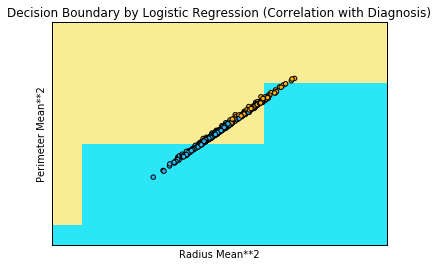

In [16]:
logreg = linear_model.LogisticRegression(C=1e5)
plt.figure(figsize = (100, 100))
h = 0.3
x = data[['radius.mean', 'perimeter.mean']]
y = data['diagnosis']
x = np.log(x)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)


# Fit the LogisticRegression instance
logreg = logreg.fit(x_train, y_train)

x_min, x_max = x.iloc[:,0].min() - 1, x.iloc[:,0].max() + 1
y_min, y_max = x.iloc[:,1].min() - 1, x.iloc[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel().astype(int), yy.ravel().astype(int)])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=colormesh)

# Plot also the training points
plt.scatter(x.iloc[:, 0], x.iloc[:, 1], c=y, edgecolors='k', cmap=scattercmap)
plt.title("Decision Boundary by Logistic Regression (Correlation with Diagnosis)")
plt.xlabel('Radius Mean**2')
plt.ylabel('Perimeter Mean**2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

# Describe your observation
This feature engineering is not precise and accurate in terms of predicting the actual location of the plot. Also, it is not predicting which variables are located on the plot.

I believe that it does not pick up the noise, because it is too simple to explain variance.

# 3. Use the full data
## 5 - 7

In [158]:
# your code
from pandas.core import datetools
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

# all parameters not specified
logreg = LogisticRegression()
x = data.iloc[:, 1:]
y = data['diagnosis']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
fit = logreg.fit(x_train, y_train)
print('Test Size')
print(.2)
y_pred = fit.predict(x_test)
print('Accuracy')
print(f1_score(y_test, y_pred, average="binary"))
accu.append(f1_score(y_test, y_pred, average="binary"))
print('Precision')
print(precision_score(y_test, y_pred, average="binary"))
pred.append(precision_score(y_test, y_pred, average="binary"))

print('Recall')
print(recall_score(y_test, y_pred, average="binary"))
rec.append(recall_score(y_test, y_pred, average="binary"))
print('')



Test Size
0.2
Accuracy
0.948453608247
Precision
0.92
Recall
0.978723404255



## 8

In [160]:
# all parameters not specified
logreg = LogisticRegression()
x = data.iloc[:, 1:]
y = data['diagnosis']

ar = np.arange(.1, 1.0, .1)
accu = []
pred = []
rec = []
for i in ar:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=i, random_state=0)
    fit = logreg.fit(x_train, y_train)
    print('Test Size')
    print(i)
    y_pred = fit.predict(x_test)
    print('Accuracy')
    print(f1_score(y_test, y_pred, average="binary"))
    accu.append(f1_score(y_test, y_pred, average="binary"))
    print('Precision')
    print(precision_score(y_test, y_pred, average="binary"))
    pred.append(precision_score(y_test, y_pred, average="binary"))

    print('Recall')
    print(recall_score(y_test, y_pred, average="binary"))
    rec.append(recall_score(y_test, y_pred, average="binary"))
    print('')


Test Size
0.1
Accuracy
0.95652173913
Precision
0.916666666667
Recall
1.0

Test Size
0.2
Accuracy
0.948453608247
Precision
0.92
Recall
0.978723404255

Test Size
0.3
Accuracy
0.953846153846
Precision
0.925373134328
Recall
0.984126984127

Test Size
0.4
Accuracy
0.958579881657
Precision
0.941860465116
Recall
0.975903614458

Test Size
0.5
Accuracy
0.936585365854
Precision
0.923076923077
Recall
0.950495049505

Test Size
0.6
Accuracy
0.913580246914
Precision
0.925
Recall
0.90243902439

Test Size
0.7
Accuracy
0.920962199313
Precision
0.924137931034
Recall
0.917808219178

Test Size
0.8
Accuracy
0.905882352941
Precision
0.900584795322
Recall
0.91124260355

Test Size
0.9
Accuracy
0.900523560209
Precision
0.882051282051
Recall
0.919786096257



## 9. Report the average accuracy, precision, and recall over this process.

In [162]:

print("Accuracy Mean")
print(np.mean(accu))
print("Prediction Mean")
print(np.mean(pred))
print("Recall Mean")
print(np.mean(rec))

Accuracy Mean
0.932770567568
Prediction Mean
0.917639021955
Recall Mean
0.948947221747


# 10. Lasso Regularization
## Table in different alpha

In [163]:
# Lasso
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score, accuracy_score
from sklearn import metrics
from sklearn.metrics import precision_recall_fscore_support

# all parameters not specified
logreg = LogisticRegression()
x = data.iloc[:, 1:]
y = data['diagnosis']
df = pd.DataFrame(columns=['accuracy', 'precision', 'recall'])
alpha_ar = np.arange(.1, 1.0, .1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=0)
best_r2 = 0
best_alpha = 0
for j in alpha_ar:
    lasso = Lasso(alpha=j)
    y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
    r2_score_lasso = r2_score(y_test, y_pred_lasso)
    print("Alpha")
    print(round(j, 1))
    print("R^2")
    print(r2_score_lasso)
    if (abs(r2_score_lasso)>best_r2):
        best_r2 = r2_score_lasso
        best_alpha = j
    print("Precision, Recall, and Accuracy Table")
    print(metrics.classification_report(y_test, y_pred_lasso.round()))


Alpha
0.1
R^2
0.670518622414
Precision, Recall, and Accuracy Table
             precision    recall  f1-score   support

        0.0       0.97      0.97      0.97        67
        1.0       0.96      0.91      0.93        47
        2.0       0.00      0.00      0.00         0

avg / total       0.96      0.95      0.96       114

Alpha
0.2
R^2
0.676338466144
Precision, Recall, and Accuracy Table
             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96        67
        1.0       0.96      0.91      0.93        47
        2.0       0.00      0.00      0.00         0

avg / total       0.96      0.95      0.95       114

Alpha
0.3
R^2
0.674315749409
Precision, Recall, and Accuracy Table
             precision    recall  f1-score   support

        0.0       0.92      0.97      0.94        67
        1.0       0.95      0.85      0.90        47
        2.0       0.00      0.00      0.00         0

avg / total       0.93      0.92      0.92       

## Best regularization parameters, and best results (alpha = 0.2)

In [166]:

print("Best Alpha")
print(best_alpha)
lasso = Lasso(alpha=best_alpha)
y_pred_lasso = lasso.fit(x_train, y_train).predict(x_test)
r2_score_lasso = r2_score(y_test, y_pred_lasso)
print("R^2")
print(r2_score_lasso)
print("Precision, Recall, and Accuracy Table")
print(metrics.classification_report(y_test, y_pred_lasso.round()))

Best Alpha
0.2
R^2
0.676338466144
Precision, Recall, and Accuracy Table
             precision    recall  f1-score   support

        0.0       0.96      0.97      0.96        67
        1.0       0.96      0.91      0.93        47
        2.0       0.00      0.00      0.00         0

avg / total       0.96      0.95      0.95       114



## Lasso Regression Graph

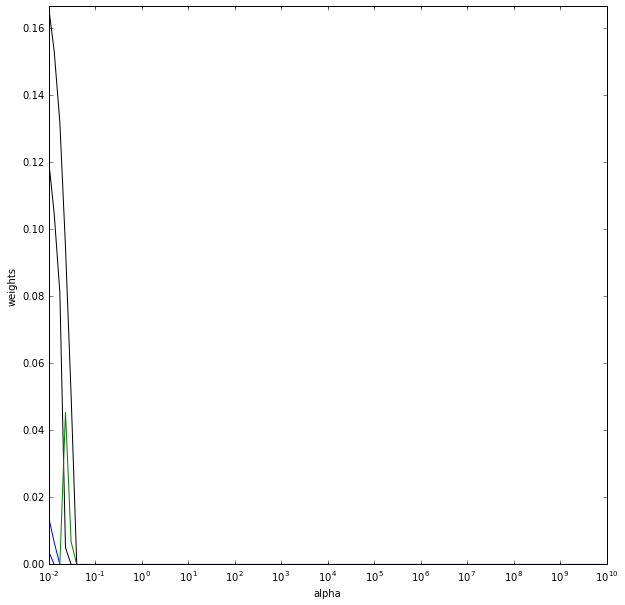

In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn import cross_validation
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error

x = data.iloc[:, 1:]
y = data['diagnosis']
coefs = []
plt.figure(figsize=(10, 10))
lasso = Lasso(max_iter=10000, normalize=True)
alphas = 10**np.linspace(10,-2,100)*0.5
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(x_train), y_train)
    coefs.append(lasso.coef_)
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('weights')